### Lecture des données

In [94]:
import dataset
import numpy as np
from sklearn.metrics import mean_squared_error

In [85]:
df = dataset.read_df(train=True)

../HAPT Data Set/Train/X_train.txt ../HAPT Data Set/Train/y_train.txt ../HAPT Data Set/Train/subject_id_train.txt


In [86]:
df.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,users_id,label
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,1,5
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,1,5
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,1,5
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,1,5
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,1,5


### Distribution des labels

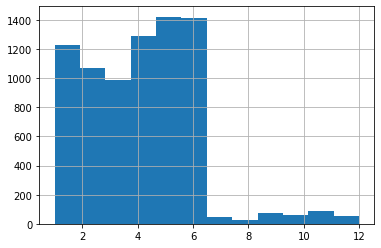

In [32]:
#nombre de données pour chaque label
df["label"].hist(bins=12)

### Corrélation

In [13]:
corr = df.corr()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,users_id,label
tBodyAcc-Mean-1,1.000000,-0.635967,-0.630025,0.023420,-0.020698,-0.045023,0.030579,-0.024288,-0.049180,0.147468,...,-0.017768,-0.132641,0.026053,-0.053429,0.030064,0.124145,-0.098704,-0.079874,-0.000838,0.066650
tBodyAcc-Mean-2,-0.635967,1.000000,0.472460,-0.022666,0.043462,0.065096,-0.024190,0.052732,0.075577,-0.112580,...,0.010830,0.047590,0.021639,0.072296,0.029428,-0.088592,0.080304,0.043551,-0.003036,0.074336
tBodyAcc-Mean-3,-0.630025,0.472460,1.000000,-0.013337,0.046654,0.069783,-0.014879,0.055531,0.080151,-0.099253,...,0.022980,0.027744,0.001779,0.016080,-0.018802,-0.079965,0.042147,0.073170,-0.002953,0.054117
tBodyAcc-STD-1,0.023420,-0.022666,-0.013337,1.000000,0.879795,0.804476,0.998320,0.858936,0.784682,0.968917,...,0.105513,-0.022767,-0.007824,0.014518,-0.022963,-0.339444,0.422214,0.363769,-0.064116,-0.505562
tBodyAcc-STD-2,-0.020698,0.043462,0.046654,0.879795,1.000000,0.873746,0.875431,0.996065,0.867446,0.848091,...,0.164964,0.020252,0.030832,-0.002586,-0.005665,-0.328960,0.423689,0.369203,-0.115576,-0.398140
tBodyAcc-STD-3,-0.045023,0.065096,0.069783,0.804476,0.873746,1.000000,0.798354,0.866089,0.995997,0.780175,...,0.116765,0.031074,0.025896,-0.012959,0.000035,-0.298680,0.385133,0.414432,-0.046601,-0.363235
tBodyAcc-Mad-1,0.030579,-0.024190,-0.014879,0.998320,0.875431,0.798354,1.000000,0.854812,0.779153,0.960180,...,0.106670,-0.029141,-0.006021,0.014408,-0.022722,-0.332691,0.413780,0.357139,-0.062688,-0.495875
tBodyAcc-Mad-2,-0.024288,0.052732,0.055531,0.858936,0.996065,0.866089,0.854812,1.000000,0.862286,0.824770,...,0.159287,0.022011,0.035898,-0.004658,-0.001583,-0.317816,0.411093,0.357991,-0.114454,-0.365423
tBodyAcc-Mad-3,-0.049180,0.075577,0.080151,0.784682,0.867446,0.995997,0.779153,0.862286,1.000000,0.757081,...,0.114199,0.034248,0.031382,-0.016988,0.000626,-0.291831,0.372595,0.398343,-0.049274,-0.330773
tBodyAcc-Max-1,0.147468,-0.112580,-0.099253,0.968917,0.848091,0.780175,0.960180,0.824770,0.757081,1.000000,...,0.108027,-0.026451,-0.017281,0.013410,-0.025747,-0.344166,0.431880,0.370933,-0.056991,-0.536458


In [79]:
corr_values = [corr[i]["label"] for i in corr.columns]
abs_corr = list(map(lambda x: abs(x), corr_values))
features_name = list(corr.columns)
max_corr = []

for i in range(9):
    index = np.where(abs_corr == np.amax(abs_corr))[0][0]
    max_corr.append(features_name[index])
    features_name.pop(index)
    abs_corr.pop(index)
max_corr.pop(0)

['fBodyAccJerk-STD-2',
 'tBodyAccJerk-Mad-2',
 'tBodyAccJerk-Min-1',
 'fBodyAccJerk-Max-2',
 'tBodyAccJerk-IQR-2',
 'tGravityAcc-Max-2',
 'tBodyAccJerkMag-Mean-1',
 'tBodyAccJerkMag-SMA-1']

### Graphique moyenne variables importante

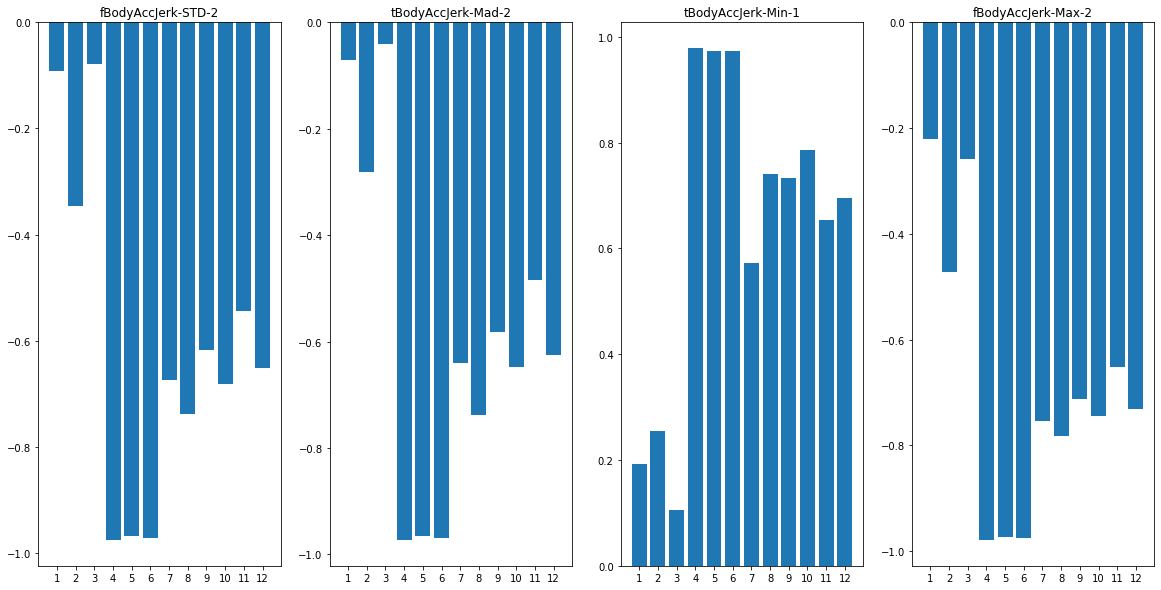

In [81]:
df_group = df.groupby(['label']).mean()
labels = ["1","2","3","4","5","6","7","8","9","10","11","12"]
plt.figure(figsize=(20, 10))
val = 141
for col in max_corr[0:4]:
    plt.subplot(val)
    plt.title(col)
    val += 1
    values = list(df_group[col])
    plt.bar(labels,values)
    

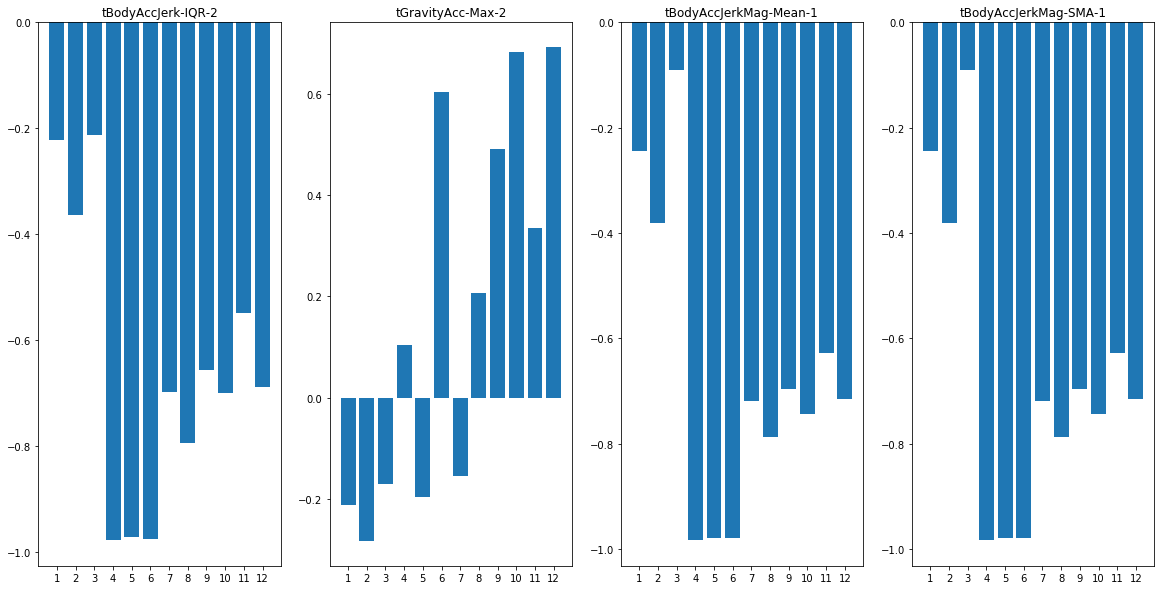

In [83]:
val = 141
plt.figure(figsize=(20, 10))
for col in max_corr[4:8]:
    plt.subplot(val)
    plt.title(col)
    val += 1
    values = list(df_group[col])
    plt.bar(labels,values)

###  Séparation dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np
train, test = train_test_split(df, test_size=0.3)
valid_pred = test["label"].values
test = test.drop(columns=["label"])
values = [5, 10, 30, 50, 100, 200, 500]

### Modèle Naïf

In [139]:
import random
#preds = [random.randint(1,12) for _ in valid_pred]
preds = [6 for _ in valid_pred]

accuracy = accuracy_score(valid_pred, preds)
mse = mean_squared_error(valid_pred, preds)
print(mse, accuracy)

8.866151866151867 0.1956241956241956


# XGB

In [96]:
acc_stats_xgb = []
mse_stats_xgb = []
for i in values:
    print(i)
    xg_class = XGBClassifier(objective ='reg:linear',
                             n_estimators = i)
    xg_class.fit(train.drop(columns=["label"]),train["label"].values)
    preds = xg_class.predict(test)
    accuracy = accuracy_score(valid_pred, preds)
    mse = mean_squared_error(valid_pred, preds)
    mse_stats_xgb.append(mse)
    acc_stats_xgb.append(accuracy)


5
10
30
50
100
200
500


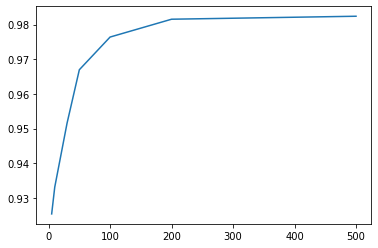

In [97]:
plt.plot(values, acc_stats_xgb)

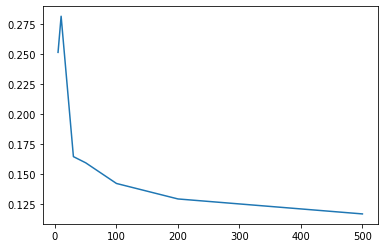

In [98]:
plt.plot(values, mse_stats_xgb)

# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

acc_stats_rf = []
mse_stats_rf = []
for i in values:
    print(i)
    model = RandomForestClassifier(n_estimators=i, 
                                   bootstrap = True,
                                   max_features = 'sqrt')
    model.fit(train.drop(columns=["label"]),train["label"].values)
    preds = model.predict(test)
    accuracy = accuracy_score(valid_pred, preds)
    mse = mean_squared_error(valid_pred, preds)
    mse_stats_rf.append(mse)
    acc_stats_rf.append(accuracy)

5
10
30
50
100
200
500


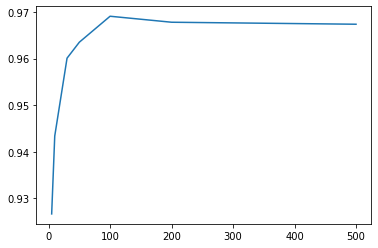

In [102]:
plt.plot(values, acc_stats_rf)

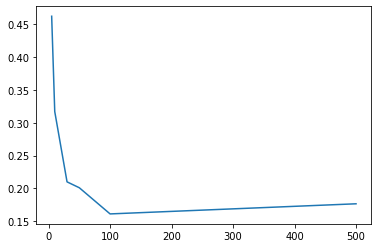

In [103]:
plt.plot(values, mse_stats_rf)

### Random Forest features importance

In [ ]:
import numpy as np


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(train.drop(columns=["label"]),train["label"].values)
importances = model.feature_importances_

std = np.std([model.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


for f in range(train.drop(columns=["label"]).shape[1]):
    print(df.columns[f], importances[indices[f]])

# Linear Regression

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=0).fit(train.drop(columns=["label"]),train["label"].values)
preds = clf.predict(test)
accuracy = accuracy_score(valid_pred, preds)
mse = mean_squared_error(valid_pred, preds)
print(mse)
print(accuracy)

C:\Users\33777\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\33777\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.15615615615615616
0.9794079794079794


### Request API

In [161]:
import requests 

features = dataset.get_features()
features.remove("label")

df_testing = dataset.read_df(train=False)

../HAPT Data Set/Test/X_test.txt ../HAPT Data Set/Test/y_test.txt ../HAPT Data Set/Test/subject_id_test.txt


In [164]:
index = 8
params = "&".join([f"{f}={df_testing[f][index]}" for f in features])

predictions = {"valid" : df_testing["label"][index]}

for endpoint in ["logistic", "xgboost", "random_forest"]:
    URL = f"http://localhost:8000/model/{endpoint}?{params}"
    r = requests.get(url = URL) 
    predictions[endpoint] = r.json()["pred"]

In [165]:
predictions

{'valid': 5, 'logistic': 5, 'xgboost': 5, 'random_forest': 5}